## Mini Project III

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# set figure size
plt.rcParams["figure.figsize"] = (12,6)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize, StandardScaler, MinMaxScaler

### Based on Banking Behavior ### 

In [364]:
#Savings Data
data_savings_acc = data = pd.read_csv("twm_savings_acct.csv", delimiter=';')
data_savings_tran = data = pd.read_csv("twm_savings_tran.csv", delimiter=';')

#Credit Data
data_credit_acc = data = pd.read_csv("twm_credit_acct.csv", delimiter=';')
data_credit_tran = data = pd.read_csv("twm_credit_acct.csv", delimiter=';')

#Total Transaction Data
transaction_data = data = pd.read_csv("twm_transactions.csv", delimiter=';')

#Accounts Data
account_data = data = pd.read_csv("twm_accounts.csv", delimiter=';')

#Customer Data
customer_data = pd.read_csv("twm_customer.csv", delimiter=';')

In [365]:
#Filter average number of transaction per account number.
filter_tran_df = transaction_data.groupby('acct_nbr')['tran_amt'].mean().to_frame()
filter_tran_df = filter_tran_df.rename(columns={"tran_amt": "avg_tran_amt"})
filter_tran_df.head(2)

,avg_tran_amt
acct_nbr,
13624802,-2.474646
13624803,18.550769


In [366]:
#No Missing Values
filter_tran_df.isnull().sum()

avg_tran_amt    0
dtype: int64

In [367]:
#Merge Tables
filter_main_df = pd.merge(data_savings_acc,data_credit_acc[["cust_id", "starting_balance","ending_balance"]], left_on='cust_id', right_on='cust_id', how='outer')
filter_main_df = pd.merge(filter_main_df,filter_tran_df[["avg_tran_amt"]], left_on='acct_nbr', right_on='acct_nbr', how='outer')
#Adding Income
filter_main_df = pd.merge(filter_main_df,customer_data[["cust_id","income"]], left_on='cust_id', right_on='cust_id', how='outer')

In [368]:
#Drop NA's
filter_main_df = filter_main_df.dropna(thresh=5)
filter_main_df

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance_x,ending_balance_x,starting_balance_y,ending_balance_y,avg_tran_amt,income
0,1363160.0,13631603.0,100.0,BS,Y,9.5.1988,NaN,113.04,122.54,657.46,286.69,0.197917,18548.0
1,1362487.0,13624873.0,500.0,MM,N,27.6.1994,25.8.1995,651.73,12.89,0.00,1548.23,-33.623158,6605.0
2,1362548.0,13625483.0,100.0,BS,Y,11.11.1986,NaN,250.24,254.02,6965.25,68.68,0.315000,44554.0
3,1362752.0,13627523.0,100.0,BS,Y,20.2.1995,NaN,600.26,609.33,2302.14,0.00,0.755833,47668.0
4,1363017.0,13630173.0,100.0,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,0.00,1000.00,37.097083,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1363141.0,13631413.0,100.0,BS,Y,11.11.1994,NaN,177.33,528.57,NaN,NaN,11.330323,18920.0
417,1363038.0,13630383.0,100.0,BS,Y,20.2.1995,NaN,333.53,508.26,0.00,1800.00,5.300303,36605.0
418,1362529.0,13625293.0,100.0,BS,Y,15.11.1992,NaN,662.06,873.14,1481.64,433.43,10.128571,43829.0
419,1362895.0,13628953.0,100.0,BS,Y,27.6.1995,NaN,169.96,96.25,0.00,1300.00,-2.632500,26387.0


In [369]:
filter_main_df['save_sum'] = filter_main_df['ending_balance_x'] - filter_main_df['starting_balance_x']

In [370]:
filter_main_df

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance_x,ending_balance_x,starting_balance_y,ending_balance_y,avg_tran_amt,income,save_sum
0,1363160.0,13631603.0,100.0,BS,Y,9.5.1988,NaN,113.04,122.54,657.46,286.69,0.197917,18548.0,9.50
1,1362487.0,13624873.0,500.0,MM,N,27.6.1994,25.8.1995,651.73,12.89,0.00,1548.23,-33.623158,6605.0,-638.84
2,1362548.0,13625483.0,100.0,BS,Y,11.11.1986,NaN,250.24,254.02,6965.25,68.68,0.315000,44554.0,3.78
3,1362752.0,13627523.0,100.0,BS,Y,20.2.1995,NaN,600.26,609.33,2302.14,0.00,0.755833,47668.0,9.07
4,1363017.0,13630173.0,100.0,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,0.00,1000.00,37.097083,0.0,890.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1363141.0,13631413.0,100.0,BS,Y,11.11.1994,NaN,177.33,528.57,NaN,NaN,11.330323,18920.0,351.24
417,1363038.0,13630383.0,100.0,BS,Y,20.2.1995,NaN,333.53,508.26,0.00,1800.00,5.300303,36605.0,174.73
418,1362529.0,13625293.0,100.0,BS,Y,15.11.1992,NaN,662.06,873.14,1481.64,433.43,10.128571,43829.0,211.08
419,1362895.0,13628953.0,100.0,BS,Y,27.6.1995,NaN,169.96,96.25,0.00,1300.00,-2.632500,26387.0,-73.71


In [371]:
filter_main_df.drop(columns=['cust_id','minimum_balance','acct_nbr','acct_type','account_active','acct_start_date',
                             'acct_end_date','starting_balance_x','ending_balance_x',
                            'starting_balance_y'], inplace=True)

In [372]:
#Final Dropna 
filter_main_df = filter_main_df.dropna()
filter_main_df = filter_main_df.rename(columns={"ending_balance_y": "credit_bal"})

In [373]:
#No Missing Values
filter_main_df.isnull().sum()

credit_bal      0
avg_tran_amt    0
income          0
save_sum        0
dtype: int64

In [374]:
#Basic Stats
filter_main_df.describe()

,credit_bal,avg_tran_amt,income,save_sum
count,297.000000,297.000000,297.000000,297.000000
mean,1113.877879,11.975860,23202.511785,364.425152
std,1221.518634,28.836928,21442.078688,1039.865104
min,0.000000,-91.625385,0.000000,-2406.270000
25%,332.950000,-0.218148,7633.000000,-6.460000
50%,1000.000000,3.980000,17804.000000,102.330000
75%,1352.700000,23.032500,32739.000000,683.020000
max,9500.000000,201.453455,142274.000000,11079.850000


In [375]:
filter_main_df.head(8)

,credit_bal,avg_tran_amt,income,save_sum
0,286.69,0.197917,18548.0,9.50
1,1548.23,-33.623158,6605.0,-638.84
2,68.68,0.315000,44554.0,3.78
3,0.00,0.755833,47668.0,9.07
4,1000.00,37.097083,0.0,890.33
5,3000.00,-22.854194,1929.0,-709.02
7,1147.07,18.053077,9622.0,468.57
8,1000.00,-7.349394,6354.0,-242.53


In [376]:
#Scale Data
ss = StandardScaler()
scaled_df = ss.fit_transform(filter_main_df)

In [377]:
#Scaling PCA Componenent
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)
components = pca.components_

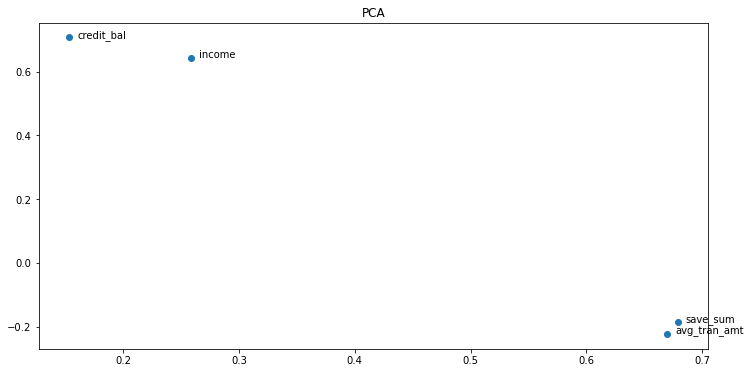

In [378]:
#PCA Scatter Plot
fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(filter_main_df.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(8,0), textcoords='offset points')
    
fig.savefig('PCA_components')

In [379]:
#For each k value, initialise k-means athen use the inertia attribute 
#and identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_df)
    Sum_of_squared_distances.append(km.inertia_)

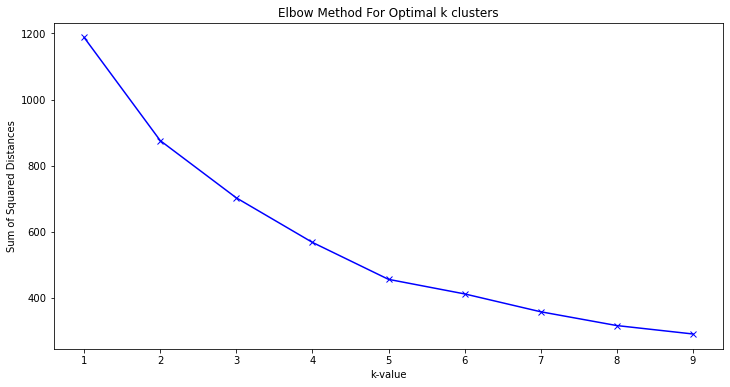

In [380]:
#The elbow indicating the optimal K (clusters) for this dataset.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k-value')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k clusters')
plt.show()

#### As per above method, the optimal number of clusters K is 4 ####

In [381]:
kmeans = KMeans(n_clusters=4).fit(scaled_df)
k_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.20010036 -0.48709379 -0.07270145 -0.42241865]
 [-0.00743523  0.8409975  -0.19818992  0.65706901]
 [ 0.14577932  4.27215609  2.05590909  4.89315401]
 [ 3.87448731 -0.08723661  2.12652497 -0.03386255]]


In [382]:
new_columns = kmeans.predict(scaled_df)
new_cols = pd.DataFrame(new_columns)

In [383]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

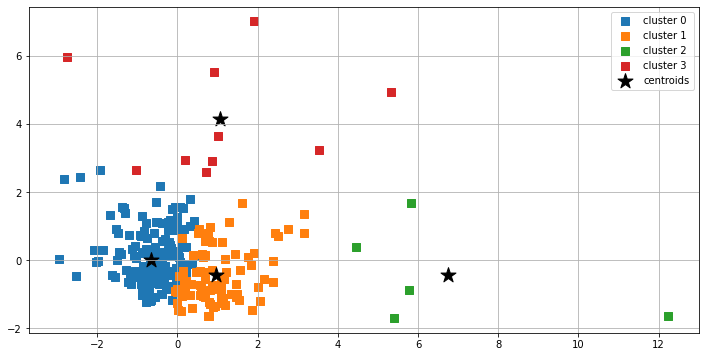

In [384]:
plot_clusters(X_pca, k_labels,plt_cluster_centers = True)

#### Plot Radar Chart using - Plotly ####

In [389]:
minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(filter_main_df)
new_df = pd.DataFrame(minmax_df, columns=filter_main_df.columns.to_list())

In [390]:
final_df = pd.concat([new_df, new_cols], axis=1)
final_df.rename(columns={0:'cluster'}, inplace=True)

In [395]:
clusters = []
cluster_list = final_df['cluster'].unique().tolist()
cluster_list.sort()

for i in cluster_list:
    clusters.append(final_df[
                        final_df['cluster'] == i
                    ])

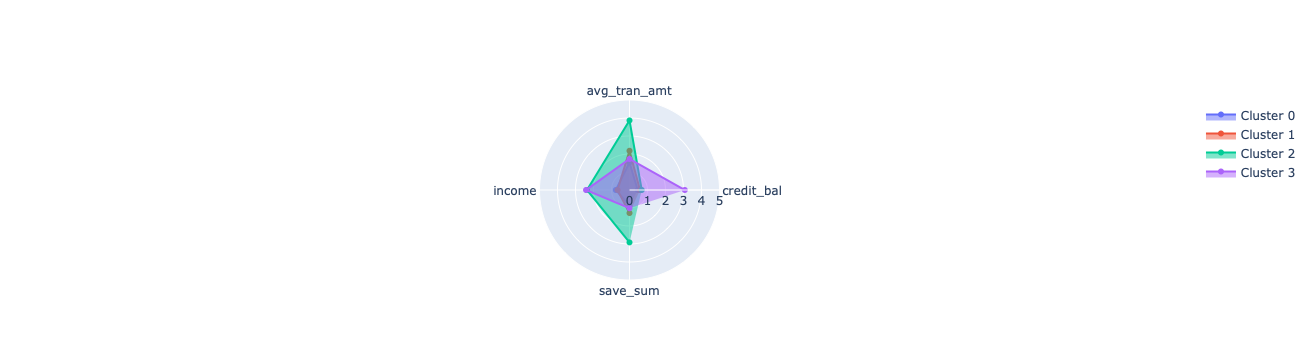

In [393]:
import plotly.graph_objects as go

categories = final_df.columns.to_list()
categories.remove('cluster')

fig = go.Figure()

for cluster in clusters:
    #R computation
    r = []
    for i in categories:
        r.append(cluster[i].mean())
        
    fig.add_trace(go.Scatterpolar(
        r=r,
        theta=categories,
        fill='toself', name=f'Cluster {cluster.iloc[0,-1]}'))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.write_html("radar.html")

fig.show()

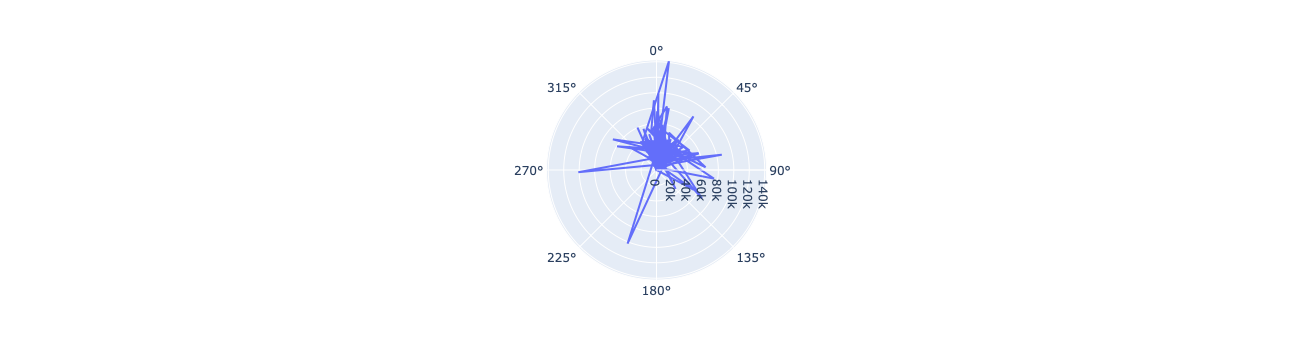

In [403]:
#Income Vs Avg transaction amount.
fig = px.line_polar(filter_main_df, r='income', theta='avg_tran_amt', line_close=True)
fig.show()

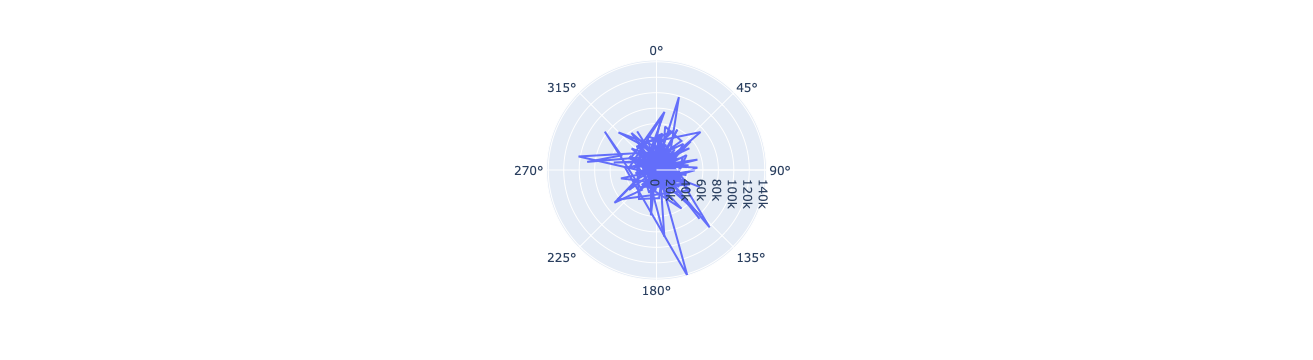

In [400]:
#Income Vs Saving Sum
fig = px.line_polar(filter_main_df, r='income', theta='save_sum', line_close=True)
fig.show()

#### Income and Credit Balance Example ####

In [348]:
def plot_clusters_simple(df_column):
    plt.scatter(df_column.iloc[:,0], df_column.iloc[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='*')
    plt.xlabel('Income($)')
    plt.ylabel('Credit Bal')
    plt.show()

In [355]:
#Income and Age Example
demo_kmean = filter_main_df[['income','credit_bal']]
#Scale Data
ss = StandardScaler()
scaled_df = ss.fit_transform(demo_kmean)
#Scaling PCA Componenent
pca = PCA(n_components=2)
X_pca = pca.fit_transform(demo_kmean)
components = pca.components_
kmeans = KMeans(n_clusters=4).fit(demo_kmean)
k_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

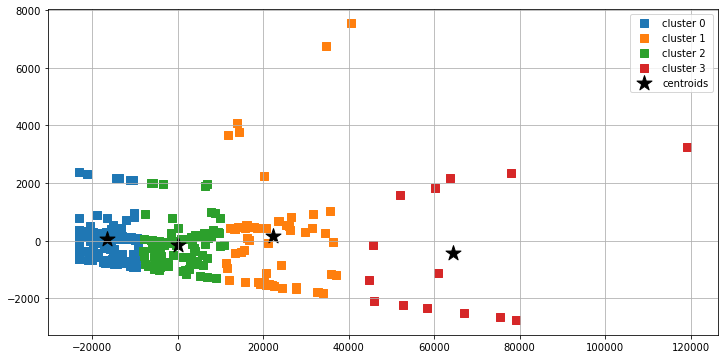

In [356]:
#Income and Credit Balance Plot
plot_clusters(X_pca, k_labels, plt_cluster_centers=True)

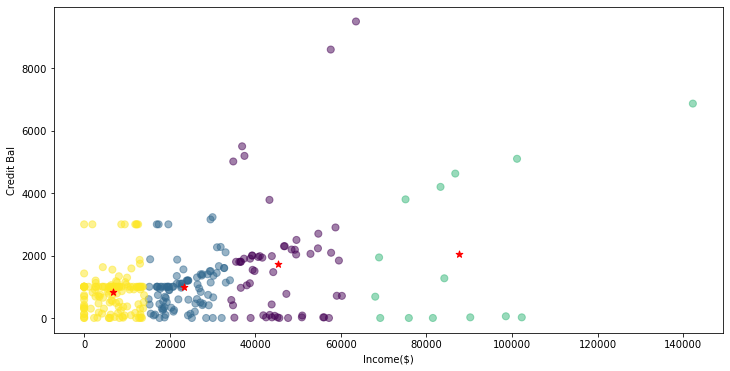

In [351]:
#Income and Credit Balance Example
kmeans = KMeans(n_clusters=4).fit(demo_kmean)
centroids = kmeans.cluster_centers_
plot_clusters_simple(demo_kmean)

In [352]:
filter_main_df['income'].describe()

count       297.000000
mean      23202.511785
std       21442.078688
min           0.000000
25%        7633.000000
50%       17804.000000
75%       32739.000000
max      142274.000000
Name: income, dtype: float64

In [353]:
filter_main_df['credit_bal'].describe()

count     297.000000
mean     1113.877879
std      1221.518634
min         0.000000
25%       332.950000
50%      1000.000000
75%      1352.700000
max      9500.000000
Name: credit_bal, dtype: float64

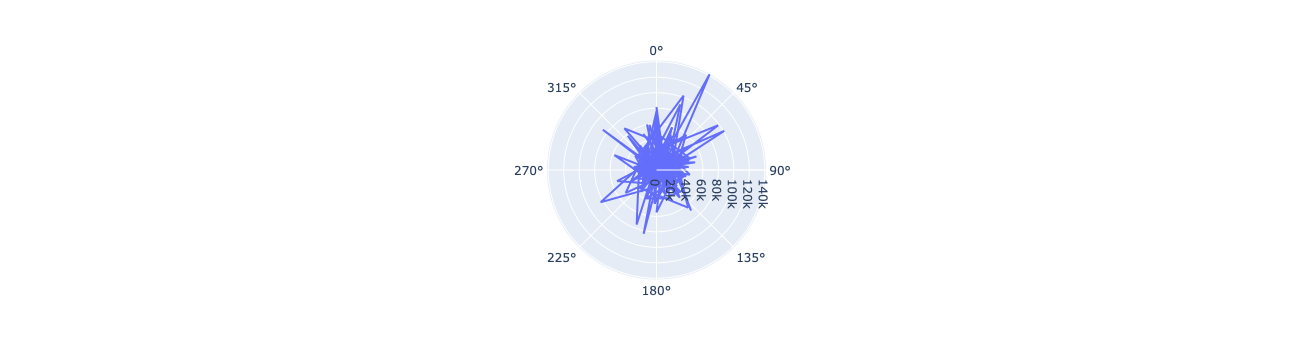

In [354]:
#Income Vs Credit Balance
fig = px.line_polar(demo_kmean, r='income', theta='credit_bal', line_close=True)
fig.show()